In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_config(config_filename):
    config = {}
    with open(config_filename, 'r') as f:
        for line in f:

            l = [el.strip() for el in line.strip().split('=')]
            if 'fn' in l[0]:  
                config[l[0]] = l[1]

            else:
                config[l[0]] = float(l[1])

    config['n_iter'] = int(config['n_iter'])
    config['np'] = int(config['np'])
    
    return config

def read_data(data_filename):
    raw_data = np.fromfile(data_filename, dtype=float)
    data = np.stack(np.split(np.stack(np.hsplit(raw_data.reshape(-1,4),4)).T[0].T, config['n_iter']+1, axis=1)) # lol magic
    return data



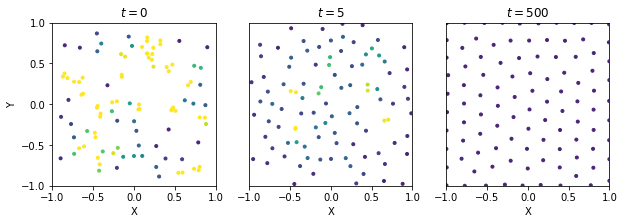

In [191]:
config_filename = '../sims/constrained_square/constrained_square.config'
config = read_config(config_filename)

data_filename = '../sims/constrained_square/constrained_square.dat'
data = read_data(data_filename)

fig,axs = plt.subplots(1, 3, figsize=(10,3))

xs, ys, zs, density = data[0]
axs[0].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.01, vmax=0.02)

xs, ys, zs, density = data[10]
axs[1].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.01, vmax=0.02)

xs, ys, zs, density = data[-1]
axs[2].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.01, vmax=0.02)


for ax in axs:

    ax.set_xticks(np.arange(-1,1.5,0.5))
    ax.set_yticks(np.arange(-1,1.5,0.5))
    ax.axis('square')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel('X')

axs[0].set_title('$t=0$')
axs[1].set_title('$t=5$')
axs[2].set_title('$t=500$')

axs[0].set_ylabel('Y')
axs[1].get_yaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)


fig.savefig('constrained_square.pdf', bbox_inches='tight')
plt.show()

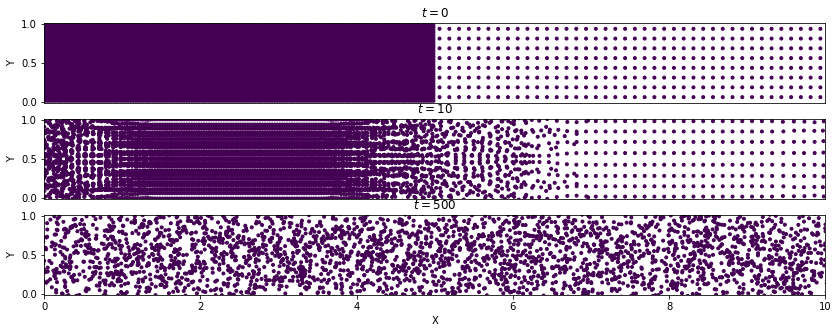

In [190]:
config_filename = '../sims/sod_shock_tube/sod_shock_tube.config'
config = read_config(config_filename)

data_filename = '../sims/sod_shock_tube/sod_shock_tube.dat'
data = read_data(data_filename)

fig,axs = plt.subplots(3, 1, figsize=(14,5))

xs, ys, zs, density = data[0]
axs[0].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.4, vmax=0.6)

xs, ys, zs, density = data[20]
axs[1].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.4, vmax=0.6)

xs, ys, zs, density = data[-1]
axs[2].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.4, vmax=0.6)


for ax in axs:

    #ax.set_xticks(np.arange(-1,1.5,0.5))
    #ax.set_yticks(np.arange(-1,1.5,0.5))
    ax.axis('equal')
    ax.set_xlim(0,10)
    ax.set_ylim(0,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

axs[0].set_title('$t=0$')
axs[1].set_title('$t=10$')
axs[2].set_title('$t=500$')
axs[0].get_xaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)


fig.savefig('sod_shock_tube.pdf', bbox_inches='tight')
plt.show()

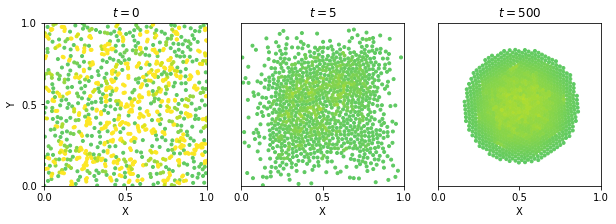

In [111]:
config_filename = '../sims/ism/ism.config'
config = read_config(config_filename)

data_filename = '../sims/ism/ism.dat'
data = read_data(data_filename)

fig,axs = plt.subplots(1, 3, figsize=(10,3))

xs, ys, zs, density = data[0]
axs[0].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.4, vmax=0.6)

xs, ys, zs, density = data[200]
axs[1].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.4, vmax=0.6)

xs, ys, zs, density = data[-1]
axs[2].scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.4, vmax=0.6)


for ax in axs:

    ax.set_xticks(np.arange(-1,1.5,0.5))
    ax.set_yticks(np.arange(-1,1.5,0.5))
    ax.axis('square')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('X')

axs[0].set_title('$t=0$')
axs[1].set_title('$t=5$')
axs[2].set_title('$t=500$')

axs[0].set_ylabel('Y')
axs[1].get_yaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)


fig.savefig('ism.pdf', bbox_inches='tight')
plt.show()

In [581]:
counter = 0
_,_,_,zd = data[0]
for i in range(len(data)):
    if i%5==0:

        xs, ys, zs, density = data[i]
        fig,ax = plt.subplots(figsize=(4,4))
        ax.scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=np.mean(zd)-np.std(zd), vmax=np.mean(zd)+np.std(zd))
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        plt.savefig('./frames/{:05}.png'.format(counter), bbox_inches='tight')
        plt.close()
        counter+=1


In [182]:
def calc_density_profile(xs, ys, zs, density, scaling_x):
    phys_x = 10
    phys_y = 1

    scaling_y = 1

    buffer_x = phys_x*0.005
    buffer_y = phys_y*0.005

    grid_x = phys_x*scaling_x
    grid_y = phys_y*scaling_y

    data_grid = np.zeros((grid_y, grid_x))
    for x,y,d in zip(xs, ys, density):

        if not (0 < x < phys_x):
            x = np.trunc(x)-buffer_x
        if not (0 < y < phys_y):
            y = np.trunc(y)-buffer_y

        i,j = int(x*scaling_x), int(y*scaling_y)
        data_grid[j,i] += 1
        
    return data_grid

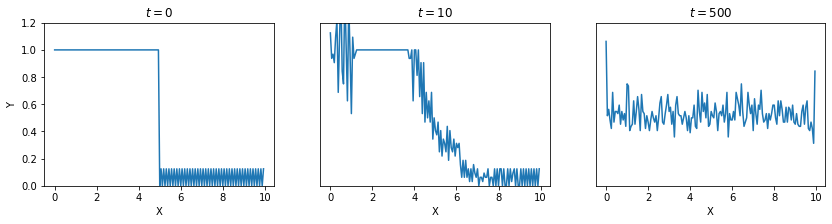

In [189]:
config_filename = '../sims/sod_shock_tube/sod_shock_tube.config'
config = read_config(config_filename)

data_filename = '../sims/sod_shock_tube/sod_shock_tube.dat'
data = read_data(data_filename)

fig,axs = plt.subplots(1, 3, figsize=(14,3))
scaling_x = 16
xs, ys, zs, density = data[0]
profile = calc_density_profile(xs, ys, zs, density, scaling_x)
axs[0].plot(np.arange(0, 10, 1/scaling_x), profile[0]/64)

xs, ys, zs, density = data[20]
profile = calc_density_profile(xs, ys, zs, density, scaling_x)
axs[1].plot(np.arange(0, 10, 1/scaling_x), profile[0]/64)

xs, ys, zs, density = data[500]
profile = calc_density_profile(xs, ys, zs, density, scaling_x)
axs[2].plot(np.arange(0, 10, 1/scaling_x), profile[0]/64)


for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylim(0,10)
    ax.set_ylim(0,1.2)

axs[0].set_title('$t=0$')
axs[1].set_title('$t=10$')
axs[2].set_title('$t=500$')

axs[0].set_ylabel('Y')
axs[1].get_yaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)


fig.savefig('sod_shock_tube_density.pdf', bbox_inches='tight')
plt.show()

In [460]:
counter = 0
for i in range(len(data)):
    if i%5==0:
        xs, ys, zs, density = data[i]
        fig,ax = plt.subplots(figsize=(4,4))
        ax.scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.01, vmax=0.02)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        plt.savefig('./frames/{:05}.png'.format(counter), bbox_inches='tight')
        plt.close()
        counter+=1


In [355]:
counter = 0
for i in range(len(data)):
    if i%5==0:
        xs, ys, zs, density = data[i]

        phys_x = 10
        phys_y = 1

        scaling_x = 16
        scaling_y = 1

        buffer_x = phys_x*0.005
        buffer_y = phys_y*0.005

        grid_x = phys_x*scaling_x
        grid_y = phys_y*scaling_y

        data_grid = np.zeros((grid_y, grid_x))
        for x,y,d in zip(xs, ys, density):

            if not (0 < x < phys_x):
                x = np.trunc(x)-buffer_x
            if not (0 < y < phys_y):
                y = np.trunc(y)-buffer_y

            i,j = int(x*scaling_x), int(y*scaling_y)
            data_grid[j,i] += 1

        fig,ax = plt.subplots()
        ax.plot(np.arange(0, 10, 1/scaling_x), data_grid[0])
        ax.set_xlim(0,10)
        ax.set_ylim(0,70)
        plt.savefig('./frames/{:05}.png'.format(counter), bbox_inches='tight')
        plt.close()
        counter+=1
